In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [2]:
life_data= pd.read_csv('Life Expectancy Data.csv')
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
life_data.isna().sum().sum()

2563

In [5]:
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


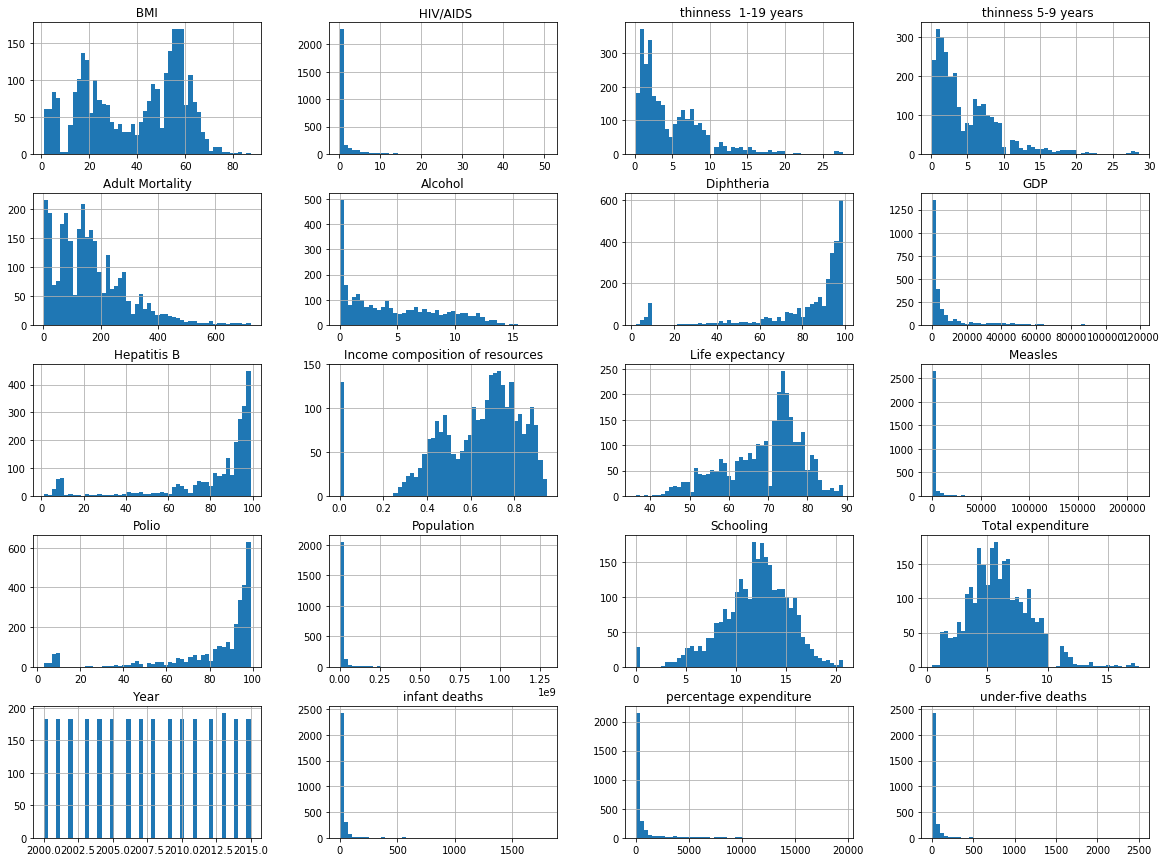

In [6]:
life_data.hist(bins=50, figsize=([20,15]))
plt.show()

In [7]:
train_set, test_set = train_test_split(life_data, test_size=0.2, random_state=42)
train_set.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
456,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
462,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
2172,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9
2667,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
381,Brunei Darussalam,2002,Developing,74.8,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3


In [0]:
corr_mat= life_data.corr()


In [9]:
corr_mat["Life expectancy "].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

In [10]:
train_set["total_deaths"]=train_set["infant deaths"]+train_set["Adult Mortality"]
train_set.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,total_deaths
456,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,126.0
462,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,152.0
2172,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9,143.0
2667,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,16.0
381,Brunei Darussalam,2002,Developing,74.8,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3,95.0


In [11]:
corr_mat=train_set.corr()
corr_mat["Life expectancy "].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.743515
Income composition of resources    0.727619
 BMI                               0.564324
Diphtheria                         0.463357
Polio                              0.451599
GDP                                0.449969
Alcohol                            0.395617
percentage expenditure             0.374437
Hepatitis B                        0.233953
Total expenditure                  0.202142
Year                               0.174669
Population                        -0.016138
Measles                           -0.164829
infant deaths                     -0.202667
under-five deaths                 -0.228497
 thinness 5-9 years               -0.474320
 thinness  1-19 years             -0.474536
 HIV/AIDS                         -0.557928
total_deaths                      -0.631732
Adult Mortality                   -0.702679
Name: Life expectancy , dtype: float64

In [12]:
train_set["under five infant deaths"]=train_set["infant deaths"]+ train_set["under-five deaths "]
train_set.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,total_deaths,under five infant deaths
456,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,126.0,0
462,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,152.0,0
2172,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9,143.0,0
2667,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,16.0,6
381,Brunei Darussalam,2002,Developing,74.8,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3,95.0,0


In [13]:
corr_mat=train_set.corr()
corr_mat["Life expectancy "].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.743515
Income composition of resources    0.727619
 BMI                               0.564324
Diphtheria                         0.463357
Polio                              0.451599
GDP                                0.449969
Alcohol                            0.395617
percentage expenditure             0.374437
Hepatitis B                        0.233953
Total expenditure                  0.202142
Year                               0.174669
Population                        -0.016138
Measles                           -0.164829
infant deaths                     -0.202667
under five infant deaths          -0.217784
under-five deaths                 -0.228497
 thinness 5-9 years               -0.474320
 thinness  1-19 years             -0.474536
 HIV/AIDS                         -0.557928
total_deaths                      -0.631732
Adult Mortality                   -0.702679
Name: Life expectancy , dtype: f

In [14]:
train_set.drop(["Year"], axis= 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
life_label= train_set["Life expectancy "]

In [16]:
life_num= train_set.drop(["Country", "Status"], axis= 1)
life_num.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,total_deaths,under five infant deaths
456,72.3,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,126.0,0
462,73.0,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,152.0,0
2172,74.6,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9,143.0,0
2667,74.9,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,16.0,6
381,74.8,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3,95.0,0


In [17]:
life_cat= train_set[["Country", "Status"]]
life_cat.head()

,Country,Status
456,Cabo Verde,Developing
462,Cabo Verde,Developing
2172,Saint Lucia,Developing
2667,Tunisia,Developing
381,Brunei Darussalam,Developing


In [0]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names=None):
    self.attribute_names=attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

In [0]:
class DataFrameImputer(TransformerMixin):
  def __init__(self):
    """Impute missing values."""
  def fit(self, X, y=None):
    self.fill= pd.Series([X[c].value_counts().index[0] if X[c].dtype==np.dtype('O') else X[c].median() for c in X],index=X.columns)
    return self
  def transform(self, X, y=None):
    return X.fillna(self.fill)

In [49]:
life_train=DataFrameImputer().fit_transform(train_set)
life_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 456 to 860
Data columns (total 23 columns):
Country                            2350 non-null object
Status                             2350 non-null object
Life expectancy                    2350 non-null float64
Adult Mortality                    2350 non-null float64
infant deaths                      2350 non-null int64
Alcohol                            2350 non-null float64
percentage expenditure             2350 non-null float64
Hepatitis B                        2350 non-null float64
Measles                            2350 non-null int64
 BMI                               2350 non-null float64
under-five deaths                  2350 non-null int64
Polio                              2350 non-null float64
Total expenditure                  2350 non-null float64
Diphtheria                         2350 non-null float64
 HIV/AIDS                          2350 non-null float64
GDP                                2350 non-n

In [47]:
train_set['Status'].mode()

0    Developing
dtype: object

In [0]:
num_attributes=list(life_num)
cat_attributes= list(life_cat)

In [0]:
num_pipeline= Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('scaler', StandardScaler()),
])

In [0]:
cat_pipeline= Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('label_binarizer', LabelBinarizer())
])

In [0]:
full_pipeline= ColumnTransformer([
    ('num_pipe', num_pipeline, num_attributes),
    ('cat_pipe', OneHotEncoder(), cat_attributes)
])

In [23]:
train_set.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,total_deaths,under five infant deaths
456,Cabo Verde,Developing,72.3,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,126.0,0
462,Cabo Verde,Developing,73.0,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,152.0,0
2172,Saint Lucia,Developing,74.6,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9,143.0,0
2667,Tunisia,Developing,74.9,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,16.0,6
381,Brunei Darussalam,Developing,74.8,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3,95.0,0


In [0]:
life_prepared= full_pipeline.fit_transform(life_train)

In [60]:
life_prepared.shape

(2350, 214)

In [26]:
type(life_prepared)

scipy.sparse.csr.csr_matrix

In [65]:
np.any(np.isnan(life_label))

True

In [0]:
df = pd.DataFrame(life_prepared.toarray(), colums=)

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213
0,0.315295,-0.317897,-0.257514,0.190375,-0.192120,0.563355,-0.200110,-0.657156,-0.262215,0.654218,-0.672494,0.655670,-0.225454,-0.260221,-0.187858,0.757278,0.713012,-0.158035,-0.045653,-0.392005,-0.260465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.388549,-0.109963,-0.257514,-0.186401,-0.291864,0.387715,-0.200110,-0.827479,-0.262215,0.353816,-0.303027,-3.094625,-0.187469,-0.399311,-0.188737,1.054068,1.004549,-0.356058,-0.322237,-0.243396,-0.260465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.555987,-0.181940,-0.257514,1.510372,-0.369082,0.695084,-0.200110,0.294651,-0.262215,0.697132,0.689138,0.697808,-0.320418,-0.361129,-0.168721,-0.110264,-0.116749,0.490490,0.261663,-0.294838,-0.260465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.587382,-1.221608,-0.230683,-0.832302,-0.064479,0.651174,-0.198729,1.036058,-0.242595,0.654218,0.556296,0.655670,-0.320418,-0.178190,-0.174933,0.369167,0.331771,0.426133,0.814833,-1.020731,-0.237779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.576917,-0.565817,-0.257514,-1.129622,0.113299,0.695084,-0.200110,-0.531918,-0.262215,0.697132,-1.046112,0.487117,-0.320418,0.776044,-0.168721,0.437657,0.286919,0.921190,0.384590,-0.569191,-0.260465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
lin_reg= LinearRegression()
lin_reg.fit(life_prepared, life_label)

ValueError: ignored

In [0]:
life_prepared.isna().sum().sum()